# Customer Voice to Customer Score : Predictive Sentiment Analysis for Flipkart Reviews Project

# Task: 
**Problem Statement:** As a marketing data analyst at Flipkart, I was tasked by my Chief Marketing Officer (CMO) to investigate how customer reviews reflect brand sentiment and how those sentiments influence product ratings across the platform. With over 205,000 product reviews in our dataset, the goal is to uncover key behavioural signals from customer feedback, particularly what drives high or low ratings, and build a model that predicts customer satisfaction based on written reviews.

## Critical Business Questions:
1. What kind of sentiments do customers express in Flipkart reviews? 
2. Can we trust the written feedback (review text) to reflect how satisfied customers actually are?
3. Which factors, such as sentiment, review length, or product price most influence a customer's rating?
4. Can customer rating be predicted based on sentiment and product characteristics?
5. What are the recurring issues behind negative reviews, and how can we address them to reduce dissatisfaction and returns?


**I will use the following libraries:**
1. **pandas** - for data wrangling and analysis
2. **matplotlib, seaborn, wordcloud** - visualisation
3. **nltk** - for sentiment analysis with VADER and tokenization
4. **re** - regular expressions regex-based text cleaning
5. **sklearn** - for regression modeling, evaluation metrics, train-test-split

## Core tasks:
**1. Data Cleaning & Preprocessing:**
   - Handled duplicates, missing values, and outliers using IQR.
   - Cleaned messy text with regex and standardized columns like Summary and product_name.
   - Added lemmatized versions of reviews for NLP and word cloud analysis.
  
**2. Sentiment Analysis:**
   - Used VADER to generate sentiment scores and classify reviews int o5 categories via a custom Enhanced_Sentiment function.
   - Fine-tuned thresholds and handled edge cases (e.g. "ok ok", "don't buy") for more accurate sentiment classification.
  
**3. Visual & Exploratory Analysis:**
   - Created bar charts, box plots, stacked sentiment-rating distributions, and heatmaps to explore relationships between sentiment, rating, and text features.
   - Investigated interesting patterns like long reviews being more negative.
  
**4. Regression Modeling:**
   - One-hot coded Enhanced_Sentiment and trained a Linear Regression model to predict customer ratings (Rate) column.
   - Interpreted model performance using R2, MSE, MAE, and feature coefficients.
  
**5. Statistical Insights:**
   - Explored Pearson correlations between price, sentiment, review length, and ratings to reveal patterns in customer behaviour.
  

## Deliverables:
- Cleaned and structured dataset for analysis.
- Enhanced sentiment column: Enhanced_Sentiment.
- Visualizations: sentiment distribution, word clouds, box plot, heatmaps
- Regression model: predicting Rate from feature selections
- Performance metrics: R2, MSE, MAE
- Key findings and actionable insights

## Value Proposition:
This project reveals what influences customer satisfaction on an e-commerce platform (Flipkart) using real user-generated content. It empowers the product and marketing department to:
- Understand pain points and delight factors directly from customer voices
- Detect discrepancies between text sentiment and numeric ratings
- Predict future satisfaction based on review content
- Build smarter product feedback loops and prioritzation pipelines

**Dataset retrieved from**: 

Nirali Vaghani, and Mansi Thummar. (2023). Flipkart Product reviews with sentiment Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/4940809


 

# Data Cleaning

In [3]:
import os
os.getcwd()

'/Users/ashyenen/Personal Project for LinkedIn (FlipKart Reviews Dataset)'

In [4]:
import os
print(os.listdir())

['Python Personal Capstone Project - FlipKart Reviews Analysis.ipynb', '.ipynb_checkpoints', 'Dataset_SA.csv']


In [5]:
# Step 1: Data Loading and Cleaning.
# Load the flipkart csv file and create dataframe:
import pandas as pd
df_flipkart = pd.read_csv("Dataset_SA.csv")

In [6]:
# Study the dataframe's overall shape:
df_flipkart.shape  # there are 205,052 rows, 6 columns.

(205052, 6)

In [7]:
# Study the datatypes for each column:
print(df_flipkart.dtypes)  # Python automatically read all columns as an object, which is non-numeric data.


product_name     object
product_price    object
Rate             object
Review           object
Summary          object
Sentiment        object
dtype: object


In [8]:
df_flipkart.head(50)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


Before ***converting the columns to the CORRECT data, I should clean the data first to prevent data loss.**

There could be NaN values that I don't know.


In [10]:
# See what are the unique values in each column.

df_flipkart['product_price'].unique()  # strings identified in product_price.

array(['3999', '8999', '7999', '9999', '1199', '499', '1999', '1099',
       '997', '1499', '435', '1349', '30999', '13999', '9990', '14299',
       '5298', '7599', '11999', '329', '425', '249', '302', '59', '245',
       '79', '349', '449', '340', '299', '469', '26990', '23479', '29390',
       '29990', '20990', '44490', '25990', '38490', '42000', '44890',
       '31590', '41990', '52990', '33990', '18990', '50999', '45550',
       '1401', '359', '1453', '254', '205', '1256', '1547', '195', '575',
       '366', '209', '219', '549', '859', '210', '215', '1142', '235',
       '221', '1599', '2454', '6099', '2399', '599', '849', '699',
       'pigeon favourite electric kettle15 l silver black', '4449',
       '4098', '5599', '5499', '1448', '3569', '2879', '1799', '1329',
       '5390', '11500', '1220', '9050', '6505', '6495', '11595', '7649',
       '4399', '6029', '6299', '5919', '6390', '2695', '2949', '7909',
       '4499', '6525', '6589', '5039', '4219', '4319', '7499', '379',
     

In [11]:
# See what are the unique values in each column.

df_flipkart['Rate'].unique()  # strings identified in Rate column? 

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)'],
      dtype=object)

In [12]:
# See what are the unique values in each column.

df_flipkart['Rate'].unique()

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)'],
      dtype=object)

In [13]:
# Data Pre-Processing 1: Handle Missing Values.

# Search for Missing values in every column.

df_flipkart.isnull().sum(axis=0)  # Review has 24664 missing values, and Summary has 11 missing values.



product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

### There were 24664 missing Reviews, and 11 missing Summaries. 

Missing Reviews likely indicates **no detailed review submitted**

Missing Summary is suspicious, because Sentiment labels exist, but Summary text is missing. Could it be neutral? 

**Decision:**
1. Keep missing reviews as missing, but create a new feature : Review_missing = 1 (flag for later analysis)

2. Drop the 11 rows (it is a negligible impact) 

In [15]:
# Drop missing Summary rows (NaN = 11)

df_flipkart = df_flipkart.dropna(subset=['Summary'])

In [16]:
# Create missingness indicator for the Missing Reviews:

df_flipkart.loc[:, 'Review_missing'] = df_flipkart['Review'].isnull().astype(int)  # to ensure we format to int64 datatype later

In [17]:
df_flipkart.isnull().sum(axis=0)

product_name          0
product_price         0
Rate                  0
Review            24662
Summary               0
Sentiment             0
Review_missing        0
dtype: int64

In [18]:
# View missing review rows with relevant columns like Summary and Sentiment.

df_flipkart[df_flipkart['Review'].isnull()] 

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing
41625,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,best product,positive,1
41626,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very good,positive,1
41627,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very comfortablegood qualitylove it,positive,1
41628,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very soft and comfortable go for it,positive,1
41629,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,super product quality is vry good tnx flipkart,positive,1
...,...,...,...,...,...,...,...
113340,Men 9325 Latest Collection Stylish Sports Snea...,299,3,NaN,ok oky hai according prise,positive,1
113341,Men 9325 Latest Collection Stylish Sports Snea...,299,5,NaN,nice,positive,1
113342,Men 9325 Latest Collection Stylish Sports Snea...,299,5,NaN,nice product,positive,1
113343,Men 9325 Latest Collection Stylish Sports Snea...,299,3,NaN,nice,positive,1


In [19]:
# View the missing reviews where Sentiment is 'positive'

df_flipkart[(df_flipkart['Review'].isnull()) & (df_flipkart['Sentiment'] == 'positive')]

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing
41625,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,best product,positive,1
41626,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very good,positive,1
41627,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very comfortablegood qualitylove it,positive,1
41628,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,very soft and comfortable go for it,positive,1
41629,Top - Pyjama Set Thermal For Boys & Girls?????...,365,5,NaN,super product quality is vry good tnx flipkart,positive,1
...,...,...,...,...,...,...,...
113339,Men 9325 Latest Collection Stylish Sports Snea...,299,5,NaN,very nice,positive,1
113340,Men 9325 Latest Collection Stylish Sports Snea...,299,3,NaN,ok oky hai according prise,positive,1
113341,Men 9325 Latest Collection Stylish Sports Snea...,299,5,NaN,nice,positive,1
113342,Men 9325 Latest Collection Stylish Sports Snea...,299,5,NaN,nice product,positive,1


In [321]:
# How many of these missing Reviews are 'positive', 'neutral', and 'negative' respectively?

df_flipkart[df_flipkart['Review'].isnull()].groupby('Sentiment').size()

Sentiment
negative     3831
neutral      1427
positive    19404
dtype: int64

### Observation for Missing Reviews:

Total rows: 205,052 rows.
Missing Reviews entries: 24,662, where:
- Positive sentiment: 19,404
- Negative sentiment: 3,831
- Neutral: 1,427

Most missing reviews are labeled positive. This is unusual at first glance, we usually expect positive sentiments to be accompanied by some review text like praise or appreciation. Maybe most satisfied customers left good Ratings but did not review. **I will need to clean the Rate column since there are strings in it to find out.**

Usually negative sentiments are more likely to have reviews, but fewer missing reviews of 3,831 warrants more investigation. Could the product be so insignificant that they simply would not purchase anymore, hence no reviews = no hassle?



In [22]:
# Now let's view the problem (strings) in 'Rate' and 'product_price'

# Check non-numeric values in 'Rate'
# Show full rows where 'Rate' is non-numeric
invalid_rate_rows = df_flipkart[~df_flipkart['Rate'].astype(str).str.match(r'^\d+(\.\d+)?$')]
print("Rows with non-numeric 'Rate':")
display(invalid_rate_rows)

Rows with non-numeric 'Rate':


,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing
17299,"Pigeon Favourite Electric Kettle??????(1.5 L, ...",pigeon favourite electric kettle15 l silver black,"Pigeon Favourite Electric Kettle??????(1.5 L, ...","pigeon favourite electric kettle??????(1.5 l, ...",pigeon favourite electric kettle15 l silver black,positive,0
175895,Bajaj DX 2 LW Dry Iron,Bajaj DX 2 LW Dry Iron,Bajaj DX 2 L/W Dry Iron,bajaj dx 2 l/w dry iron,bajaj dx 2 lw dry iron,negative,0
175906,Nova Plus Amaze NI 10 1100 W Dry IronGrey Tur...,Nova Plus Amaze NI 10 1100 W Dry IronGrey Tur...,Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ...,nova plus amaze ni 10 1100 w dry iron?ãâ¿?ãâ...,nova plus amaze ni 10 1100 w dry irongrey turq...,positive,0


In [23]:
# Show full rows where 'product_price' is non-numeric
invalid_price_rows = df_flipkart[~df_flipkart['product_price'].astype(str).str.match(r'^\d+(\.\d+)?$')]
print("Rows with non-numeric 'product_price':")
display(invalid_price_rows)

Rows with non-numeric 'product_price':


,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing
17299,"Pigeon Favourite Electric Kettle??????(1.5 L, ...",pigeon favourite electric kettle15 l silver black,"Pigeon Favourite Electric Kettle??????(1.5 L, ...","pigeon favourite electric kettle??????(1.5 l, ...",pigeon favourite electric kettle15 l silver black,positive,0
175895,Bajaj DX 2 LW Dry Iron,Bajaj DX 2 LW Dry Iron,Bajaj DX 2 L/W Dry Iron,bajaj dx 2 l/w dry iron,bajaj dx 2 lw dry iron,negative,0
175906,Nova Plus Amaze NI 10 1100 W Dry IronGrey Tur...,Nova Plus Amaze NI 10 1100 W Dry IronGrey Tur...,Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ...,nova plus amaze ni 10 1100 w dry iron?ãâ¿?ãâ...,nova plus amaze ni 10 1100 w dry irongrey turq...,positive,0


Observation: It seems like the invalid rows belong to the same records for both product_price and Rate. These should be dropped as they are not useful for my analysis.

In [25]:
# Drop the invalid non-numeric rows in Rate and product_price:

# Define a pattern that match these strange numbers first
numeric_pattern = r'^\d+(\.\d+)?$'

# Create boolean masks for valid numeric values:
valid_rate = df_flipkart['Rate'].astype(str).str.match(numeric_pattern)
valid_price = df_flipkart['product_price'].astype(str).str.match(numeric_pattern)

# Combine both conditions: keep rows where both Rate and product_price are numeric:
df_flipkart = df_flipkart[valid_rate & valid_price].copy()

In [26]:
# Check if the invalid strings in Rate is removed:
df_flipkart['Rate'].unique()

array(['5', '3', '1', '4', '2'], dtype=object)

In [27]:
# Check if the invalid strings in product_price is removed:
df_flipkart['product_price'].unique()

array(['3999', '8999', '7999', '9999', '1199', '499', '1999', '1099',
       '997', '1499', '435', '1349', '30999', '13999', '9990', '14299',
       '5298', '7599', '11999', '329', '425', '249', '302', '59', '245',
       '79', '349', '449', '340', '299', '469', '26990', '23479', '29390',
       '29990', '20990', '44490', '25990', '38490', '42000', '44890',
       '31590', '41990', '52990', '33990', '18990', '50999', '45550',
       '1401', '359', '1453', '254', '205', '1256', '1547', '195', '575',
       '366', '209', '219', '549', '859', '210', '215', '1142', '235',
       '221', '1599', '2454', '6099', '2399', '599', '849', '699', '4449',
       '4098', '5599', '5499', '1448', '3569', '2879', '1799', '1329',
       '5390', '11500', '1220', '9050', '6505', '6495', '11595', '7649',
       '4399', '6029', '6299', '5919', '6390', '2695', '2949', '7909',
       '4499', '6525', '6589', '5039', '4219', '4319', '7499', '379',
       '3499', '6999', '224', '227', '385', '199', '999', '480', 

In [28]:
df_flipkart.shape 

(205038, 7)

In [29]:
# Now set product_price and Rate to int64 datatype:

df_flipkart['Rate'] = pd.to_numeric(df_flipkart['Rate'], errors = 'coerce')

In [30]:
# Now set product_price and Rate to int64 datatype:

df_flipkart['product_price'] = pd.to_numeric(df_flipkart['product_price'], errors = 'coerce')

In [31]:
print(df_flipkart.dtypes)

product_name      object
product_price      int64
Rate               int64
Review            object
Summary           object
Sentiment         object
Review_missing     int64
dtype: object


In [32]:
# Data Pre-Processing 2: Check for duplicates.

duplicates = df_flipkart[df_flipkart.duplicated()]
duplicates   

# Since there is no unique identifier for each product, product_name can appear more than once. Let's check Review and Summary for duplicates.

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing
150,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,4,really nice,good product,positive,0
154,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,highly recommended,awesome,positive,0
248,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,mind-blowing purchase,awesome product,positive,0
288,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,4,wonderful,good,positive,0
314,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,perfect product!,good product,positive,0
...,...,...,...,...,...,...,...
205036,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,great product,good product,positive,0
205041,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,super,positive,0
205042,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,nice product,positive,0
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,0


In [33]:
duplicates2 = df_flipkart[df_flipkart.duplicated(subset=['Rate', 'Review', 'Summary'])]
duplicates2


# Nothing out of the ordinary. Multiple people can review the same product, so we will keep them.

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing
150,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,4,really nice,good product,positive,0
154,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,highly recommended,awesome,positive,0
182,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,mind-blowing purchase,awesome,positive,0
248,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,mind-blowing purchase,awesome product,positive,0
288,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,4,wonderful,good,positive,0
...,...,...,...,...,...,...,...
205044,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,superb,positive,0
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,terrific,good quality products,positive,0
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,0
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive,0


In [34]:
# Data Pre-processing 3: Check for weird / errorneous data

print(df_flipkart.dtypes)

# Summary stats of numeric columns:
print(df_flipkart['product_price'].describe()) #$86,990 is the max price. Seems unusual for a flipkart product, let's check.

product_name      object
product_price      int64
Rate               int64
Review            object
Summary           object
Sentiment         object
Review_missing     int64
dtype: object
count    205038.000000
mean       4135.341117
std        9882.166775
min          59.000000
25%         319.000000
50%         675.000000
75%        2999.000000
max       86990.000000
Name: product_price, dtype: float64


In [35]:
# Which products are above $50,000?

df_flipkart[df_flipkart['product_price']>50000]  # There is nothing wrong. Did a check online, they are in indian rupees.

# Example the price of ₹55,990 is a Free Standing 14 Place standings dishwasher. In SGD it is about $832.51 which seems normal.

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing
13130,LG DFB424FP Free Standing 14 Place Settings In...,52990,5,simply awesome,best in class after searching for various prod...,positive,0
13131,LG DFB424FP Free Standing 14 Place Settings In...,52990,5,worth every penny,the best ever dishwasher the extra dry feature...,positive,0
13132,LG DFB424FP Free Standing 14 Place Settings In...,52990,5,terrific purchase,i didnt have much expectations from lg dishwas...,positive,0
13133,LG DFB424FP Free Standing 14 Place Settings In...,52990,5,brilliant,bought a year back and used it extensively dur...,positive,0
13134,LG DFB424FP Free Standing 14 Place Settings In...,52990,5,wonderful,lovely dishwashersuitable for family of 4 with...,positive,0
...,...,...,...,...,...,...,...
85351,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,59990,5,awesome,worth every penny,positive,0
85352,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,59990,5,great product,very good thanks flipcart,positive,0
85353,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,59990,3,just okay,build quality is very poor on right hand side ...,positive,0
85354,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,59990,5,worth every penny,super,positive,0


In [36]:
# Additional check: Check for product_price's outliers:

q1 = df_flipkart['product_price'].quantile(q=.25)
q3 = df_flipkart['product_price'].quantile(q=.75)
print(q1)
print(q3)

319.0
2999.0


In [37]:
# Define IQR for product_price.

iqr = q3 - q1
iqr 
print(f"Q1 = {q1:,}")
print(f"Q3 = {q3:,}")
print(f"IQR = {iqr:,}")

lower_bound = q1 - 1.5 *iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Limit: {lower_bound}")
print(f"Upper Limit: {upper_bound}")

Q1 = 319.0
Q3 = 2,999.0
IQR = 2,680.0
Lower Limit: -3701.0
Upper Limit: 7019.0


In [38]:
# Take a deeper look into product_price's outliers:

df_flipkart[((df_flipkart['product_price']<q1-1.5*iqr) | (df_flipkart['product_price']>q3+1.5*iqr))]  

# While there are outliers detected, these seemed normal as flipkart sells a variety of lifestyle products ranging from extreme low prices to very high prices.

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing
10,Candes 60 L Room/Personal Air Cooler??????(Whi...,8999,5,great product,beautiful product good material and perfectly ...,positive,0
11,Candes 60 L Room/Personal Air Cooler??????(Whi...,8999,5,mind-blowing purchase,awesome,positive,0
12,Candes 60 L Room/Personal Air Cooler??????(Whi...,8999,5,highly recommended,good,positive,0
13,Candes 60 L Room/Personal Air Cooler??????(Whi...,8999,5,brilliant,wonderful product must buy,positive,0
14,Candes 60 L Room/Personal Air Cooler??????(Whi...,8999,5,classy product,nice air cooler smart cool breeze producer,positive,0
...,...,...,...,...,...,...,...
195826,CELLBELL Aries C160 High Back Mesh Office Adju...,7599,5,highly recommended,its a very comfortable chairvery much satisfie...,positive,0
195827,CELLBELL Aries C160 High Back Mesh Office Adju...,7599,4,really nice,comfortable to sit and swivel around back and ...,positive,0
195828,CELLBELL Aries C160 High Back Mesh Office Adju...,7599,5,mind-blowing purchase,worth it,positive,0
195829,CELLBELL Aries C160 High Back Mesh Office Adju...,7599,4,really nice,comfortable and good quality,positive,0


In [39]:
# Check categorical columns with unique data again:

print(df_flipkart['product_name'].unique())

['Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)'
 'Candes 60 L Room/Personal Air Cooler??????(White, Black, CRETA)'
 'MAHARAJA WHITELINE 65 L Desert Air Cooler??????(White, Grey, Rambo Grey / AC-303)'
 'Crompton 75 L Desert Air Cooler??????(White, Teal, ACGC-DAC751)'
 'boAt Rockerz 510 Super Extra Bass Bluetooth Headset??????(Molten Orange, On the Ear)'
 'Aroma NB119 Titanium - 48 Hours Playtime Bluetooth Neckband Bluetooth Headset??????(Green, In the Ear)'
 'OnePlus Bullets Wireless Z2 with Fast Charge, 30 Hrs Battery Life, Earphones with mic Bluetooth Headset??????(Magico Black, In the Ear)'
 'OnePlus Bullets Wireless Z2 Bluetooth Headset??????(Acoustic Red, In the Ear)'
 'Mivi Roam2 5 W Bluetooth Speaker??????(Black, Mono Channel)'
 'etmax NANO BLACK 30 W Bluetooth Home Theatre??????(Black, Stereo Channel)'
 'Mivi Fort S16 Soundbar with 2 full range drivers, Made in India 16 W Bluetooth Soundbar??????(Black,

In [40]:
# Check Rate column with unique data again to confirm there are no issues:

print(df_flipkart['Rate'].unique())

[5 3 1 4 2]


In [41]:
# Check categorical columns with unique data again:

print(df_flipkart['Review'].unique())

['super!' 'awesome' 'fair' ... 'good quality dinner set'
 'good quality product and good option for some one gift.'
 'product looking very nice & strong quality']


In [42]:
# Check categorical columns with unique data again:

print(df_flipkart['Sentiment'].unique())

['positive' 'negative' 'neutral']


In [43]:
# Final check that there are no more missing values besides Review:

df_flipkart.isnull().sum()

# I shall not remove the 24662 missing Reviews because the kaggle dataset mentioned "if any product doesnt have any review but summary is present then NaN value is added."

# Since there are no other missing values in Rate and Summary, the Sentiment is based on the Summary given and is a valid case in this dataset. 

product_name          0
product_price         0
Rate                  0
Review            24662
Summary               0
Sentiment             0
Review_missing        0
dtype: int64

In [44]:
df_flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205038 entries, 0 to 205051
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   product_name    205038 non-null  object
 1   product_price   205038 non-null  int64 
 2   Rate            205038 non-null  int64 
 3   Review          180376 non-null  object
 4   Summary         205038 non-null  object
 5   Sentiment       205038 non-null  object
 6   Review_missing  205038 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 12.5+ MB


In [45]:
# Descriptive statistics of all numerical columns:

df_flipkart.describe()  # looks good.

,product_price,Rate,Review_missing
count,205038.000000,205038.000000,205038.00000
mean,4135.341117,4.123289,0.12028
std,9882.166775,1.306340,0.32529
min,59.000000,1.000000,0.00000
25%,319.000000,4.000000,0.00000
50%,675.000000,5.000000,0.00000
75%,2999.000000,5.000000,0.00000
max,86990.000000,5.000000,1.00000


In [46]:
df_flipkart.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment', 'Review_missing'],
      dtype='object')

# REGEX Cleaning

How REGEX works:

**re.sub(r'[^a-z\s]',",text)**

^ = "not"
a-z = lowercase letters
\s = spaces

so it removes anything that is not a letter or space.

e.g. Candes 12 L Room/Personal Air Cooler????? (White/Black)

will become

candes l roompersonal air coolerwhiteblack

In [49]:
# REGEX Cleaning:

import re
import pandas as pd 

def clean_text(text):  # createa  function called clean_text 
    if pd.isna(text):  # if the value is missing, just return an empty string instead of crashing.
        return "" 
    text = text.lower()   # convert all text to lowercases to make things consistent.
    text = re.sub(r'[^a-z]', ' ', text)  # REGEX begins here. Make sure to space the ' ' so words do not stick together. 
    text = re.sub(r'\s+', ' ',text) # This replace non-letters with a space.
    return text.strip()  # removes any leading / trailing spaces. if theres an extra space at the beginning or end like "  cooler ", it will remove it.

df_flipkart['product_name_clean'] = df_flipkart['product_name'].apply(clean_text)  # goes through every row using pandas and run it through the clean_text function and saved into a new column called product_name_clean.

In [50]:
df_flipkart.head()  # we can see that the product_name looks cleaner without unecessary noise.


,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing,product_name_clean
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,0,candes l room personal air cooler white black ...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,0,candes l room personal air cooler white black ...
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,0,candes l room personal air cooler white black ...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,0,candes l room personal air cooler white black ...
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,0,candes l room personal air cooler white black ...


In [51]:
df_flipkart['product_name_clean'].unique()

array(['candes l room personal air cooler white black elegant high speed honey comb cooling pad ice chamber blower',
       'candes l room personal air cooler white black creta',
       'maharaja whiteline l desert air cooler white grey rambo grey ac',
       'crompton l desert air cooler white teal acgc dac',
       'boat rockerz super extra bass bluetooth headset molten orange on the ear',
       'aroma nb titanium hours playtime bluetooth neckband bluetooth headset green in the ear',
       'oneplus bullets wireless z with fast charge hrs battery life earphones with mic bluetooth headset magico black in the ear',
       'oneplus bullets wireless z bluetooth headset acoustic red in the ear',
       'mivi roam w bluetooth speaker black mono channel',
       'etmax nano black w bluetooth home theatre black stereo channel',
       'mivi fort s soundbar with full range drivers made in india w bluetooth soundbar black channel',
       'i kall ik w bluetooth home theatre black channel',
  

In [52]:
df_flipkart['Review'].unique()

array(['super!', 'awesome', 'fair', ..., 'good quality dinner set',
       'good quality product and good option for some one gift.',
       'product looking very nice & strong quality'], dtype=object)

In [53]:
df_flipkart[df_flipkart['Review'].astype(str).str.contains(r'\.\.\.', na=False)]  # let's check what in Reviews contains the string .\.\. the three literal dots.

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing,product_name_clean
953,"Crompton 75 L Desert Air Cooler??????(White, T...",9999,5,must buy.......,great product by crompton nice cooling nice lo...,positive,0,crompton l desert air cooler white teal acgc dac
2247,boAt Rockerz 510 Super Extra Bass Bluetooth He...,1199,3,not perfect...,honestly i was very excited to get this produc...,positive,0,boat rockerz super extra bass bluetooth headse...
2311,boAt Rockerz 510 Super Extra Bass Bluetooth He...,1199,4,worth every penny... superb,i have been using this headphone for more than...,positive,0,boat rockerz super extra bass bluetooth headse...
6931,"Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...",30999,5,awesome...best for beginner's!!!!!!!!,i liked the product very much but i was very m...,positive,0,canon eos d dslr camera camera body mm lens black
9091,Eurodomo Hood Indigo PRO HC SC FL BK 60 Auto C...,7599,5,woww product...,excellent chimney with good features and less ...,positive,0,eurodomo hood indigo pro hc sc fl bk auto clea...
9410,Eurodomo Hood Indigo PRO HC SC FL BK 60 Auto C...,7599,5,awesome both product & service...,product is good suitable for four burner gas s...,positive,0,eurodomo hood indigo pro hc sc fl bk auto clea...
11904,IFB Neptune FX Free Standing 12 Place Settings...,29990,5,i should have bought it earlier....,must have,positive,0,ifb neptune fx free standing place settings wi...
12043,IFB Neptune SX1 Free Standing 15 Place Setting...,44490,5,highly recommended....,great i have purchased dish washer for the pro...,positive,0,ifb neptune sx free standing place settings wi...
12061,IFB Neptune SX1 Free Standing 15 Place Setting...,44490,5,value to money (smile)...!!!,your wifes satisfaction is more valuable than ...,positive,0,ifb neptune sx free standing place settings wi...
12383,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,highly recommended....,great i have purchased dish washer for the pro...,positive,0,ifb neptune vx free standing place settings wi...


**Observation: I detected some potential inconsistencies in Review column.**

The review for product_name "boAT Rockerz 510 Super Extra Bass Bluetooth Headset" is "not perfect...", but the Sentiment is labelled 'positive'. Further sentiment analysis is required.

Well, NLP in machine learning is known to have limitations and do not detect sarcasm and negations very well so the word "not perfect" was marked positive when it should have been more of neutral or negative.  

Since the original Sentiment may have missed out certain negations and sarcasm, I will train and explore my own sentiment analysis logic based on cleaner, lemmatized text.

# NLP, Sentiment Analysis, Lemmatization

1. Reclean the text
2. Tokenize
3. Lemmatize
4. Vectorize for modeling
5. Visualise the data using wordcloud

In [56]:
# Import the necessary libraries:

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK resources:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/ashyenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashyenen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashyenen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
# Basic Regex Cleaning on Summary column

def clean_summary(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z]', ' ', text)  # keep only letters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

df_flipkart['Summary_clean'] = df_flipkart['Summary'].apply(clean_summary)

In [58]:
df_flipkart.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing,product_name_clean,Summary_clean
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,0,candes l room personal air cooler white black ...,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,0,candes l room personal air cooler white black ...,best budget fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,0,candes l room personal air cooler white black ...,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,0,candes l room personal air cooler white black ...,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,0,candes l room personal air cooler white black ...,ok ok product


In [59]:
# Tokenization + Stopword Removal + Lemmatization

# Lemmatization with stopwords removal as column "Summary_lemmatized" for WordCloud:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def normalize_text(text):
    tokens = word_tokenize(text)
    filtered = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df_flipkart['Summary_lemmatized'] = df_flipkart['Summary_clean'].apply(normalize_text)

# We will keep Summary_lemmatized column for WordCloud generator because the stopword removal helps declutter unmeaningful words like "is" "the"

In [60]:
df_flipkart.head(50)

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing,product_name_clean,Summary_clean,Summary_lemmatized
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,0,candes l room personal air cooler white black ...,great cooler excellent air flow and for this p...,great cooler excellent air flow price amazing ...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,0,candes l room personal air cooler white black ...,best budget fit cooler nice cooling,best budget fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,0,candes l room personal air cooler white black ...,the quality is good but the power of air is de...,quality good power air decent
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,0,candes l room personal air cooler white black ...,very bad product its a only a fan,bad product fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,0,candes l room personal air cooler white black ...,ok ok product,ok ok product
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive,0,candes l room personal air cooler white black ...,the cooler is really fantastic and provides go...,cooler really fantastic provides good air flow...
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive,0,candes l room personal air cooler white black ...,very good product,good product
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive,0,candes l room personal air cooler white black ...,very nice,nice
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative,0,candes l room personal air cooler white black ...,very bad cooler,bad cooler
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive,0,candes l room personal air cooler white black ...,very good,good


### I applied lemmatization to standardize word forms and created two versions: one keeping all words for emotional fidelity in sentiment analysis, and one with stopwords removed for clearer keyword visualization. This shows how preprocessing choices depend on the task — not one-size-fits-all.

In [62]:
# Lemmatization without Stopwords removal as column "Summary_lemmatized_allwords"

def normalize_without_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

df_flipkart['Summary_lemmatized_allwords'] = df_flipkart['Summary_clean'].apply(normalize_without_stopwords)

In [63]:
df_flipkart.head(50)

,product_name,product_price,Rate,Review,Summary,Sentiment,Review_missing,product_name_clean,Summary_clean,Summary_lemmatized,Summary_lemmatized_allwords
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,0,candes l room personal air cooler white black ...,great cooler excellent air flow and for this p...,great cooler excellent air flow price amazing ...,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,0,candes l room personal air cooler white black ...,best budget fit cooler nice cooling,best budget fit cooler nice cooling,best budget fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,0,candes l room personal air cooler white black ...,the quality is good but the power of air is de...,quality good power air decent,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,0,candes l room personal air cooler white black ...,very bad product its a only a fan,bad product fan,very bad product it a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,0,candes l room personal air cooler white black ...,ok ok product,ok ok product,ok ok product
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive,0,candes l room personal air cooler white black ...,the cooler is really fantastic and provides go...,cooler really fantastic provides good air flow...,the cooler is really fantastic and provides go...
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive,0,candes l room personal air cooler white black ...,very good product,good product,very good product
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive,0,candes l room personal air cooler white black ...,very nice,nice,very nice
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative,0,candes l room personal air cooler white black ...,very bad cooler,bad cooler,very bad cooler
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive,0,candes l room personal air cooler white black ...,very good,good,very good


<function matplotlib.pyplot.show(close=None, block=None)>

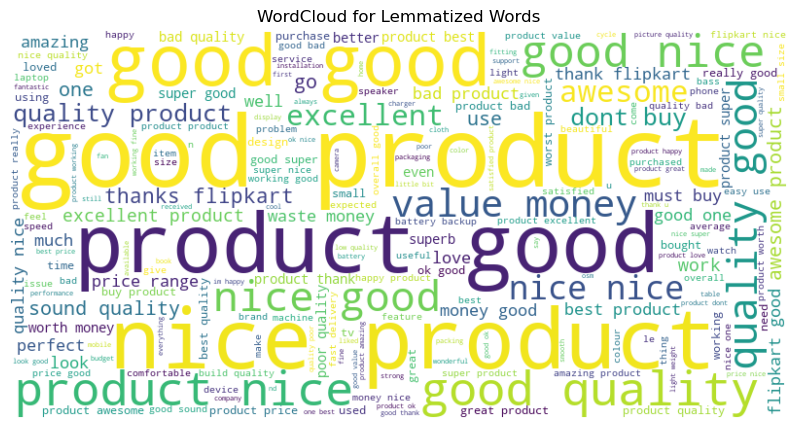

In [64]:
# Generate WordCloud for Summary_lemmatized <- with stopword removal

# Prepare text for WordCloud to generate words:
text_clean = ' '.join(df_flipkart['Summary_lemmatized'].dropna())

# Create word clouds
wordcloud = WordCloud(width=800, height = 400, background_color = 'white').generate(text_clean)

plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('WordCloud for Lemmatized Words')

plt.tight_layout()
plt.show

**Observation: Majority of the words shown are positive words like 'good', 'nice', 'excellent', 'worth money', ' thank flipkart'. Lemmatizing and tokenizing words are great for keyword extraction and giving us an overview of what customers are saying about Flipkart's products.**

This suggests that flipkart's overall business sentiment is heading a positive direction.

Next I will explore the pre-assigned Sentiment labels in greater detail, by classifying them into even detailed Sentiment Classes like 'Very Positive, Positive, Neutral, Negative, and Very Negative'.

## Sentiment Analysis VADER

In [67]:
# It is better to apply VADER to the original text since it assesses natural English with emotional intensity.

# I will apply VADER sentiment analysis on Summary column (original text).


In [68]:
# import necessary libraries

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ashyenen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [69]:
# Now instead of the pre-assigned Sentiments, I will define my custom-made 5 level function.

def five_class_sentiment(text):
    if pd.isna(text):
        return 'Neutral' # if there is no Summary then we take it as Neutral.
    score = sia.polarity_scores(text)['compound']
    if score >=0.7:
        return 'Very Positive'
    elif score >= 0.3:
        return ' Positive'
    elif score > -0.3:
        return 'Neutral'
    elif score > -0.7:
        return 'Negative'
    else:
        return 'Very Negative'
        

In [70]:
# Apply the new column to my dataframe:

df_flipkart['Sentiment_Detailed'] = df_flipkart['Summary'].apply(five_class_sentiment)

In [71]:
# Extra step: move Sentiment_Detailed column to beside Sentiment:

cols = list(df_flipkart.columns) # list all column names

cols.remove('Sentiment_Detailed') # remove 'Sentiment_Detailed' from current position

sentiment_index = cols.index('Sentiment') # find index of 'Sentiment'

cols.insert(sentiment_index + 1, 'Sentiment_Detailed')  # Insert/move Sentiment_Detailed columnn right after Sentiment column

df_flipkart = df_flipkart[cols] # Reassigns column order.

In [72]:
df_flipkart.head(100)

,product_name,product_price,Rate,Review,Summary,Sentiment,Sentiment_Detailed,Review_missing,product_name_clean,Summary_clean,Summary_lemmatized,Summary_lemmatized_allwords
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,Very Positive,0,candes l room personal air cooler white black ...,great cooler excellent air flow and for this p...,great cooler excellent air flow price amazing ...,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,Very Positive,0,candes l room personal air cooler white black ...,best budget fit cooler nice cooling,best budget fit cooler nice cooling,best budget fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,Neutral,0,candes l room personal air cooler white black ...,the quality is good but the power of air is de...,quality good power air decent,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,Negative,0,candes l room personal air cooler white black ...,very bad product its a only a fan,bad product fan,very bad product it a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,Positive,0,candes l room personal air cooler white black ...,ok ok product,ok ok product,ok ok product
...,...,...,...,...,...,...,...,...,...,...,...,...
95,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,great product,very good,positive,Positive,0,maharaja whiteline l desert air cooler white g...,very good,good,very good
96,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,highly recommended,good product delivery on time,positive,Positive,0,maharaja whiteline l desert air cooler white g...,good product delivery on time,good product delivery time,good product delivery on time
97,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,must buy!,nice product deliver in time,positive,Positive,0,maharaja whiteline l desert air cooler white g...,nice product deliver in time,nice product deliver time,nice product deliver in time
98,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,terrific purchase,i honestly liked the productbest desert cooler...,positive,Very Positive,0,maharaja whiteline l desert air cooler white g...,i honestly liked the productbest desert cooler...,honestly liked productbest desert cooler lowes...,i honestly liked the productbest desert cooler...


***Something is not right with the above sentiment analysis column "Sentiment_detailed". Need to do some investigation.*** 

The code for the 5 level sentiment classifcation looks syntactically correct, but the results for some summary looks misleading. e.g. "ok ok product" being labelled as positive when it should be neutral, and a "Dont buy this product ..." with a rating of 1 is given 'Negative' when it should be 'Very Negative'.

This arises from the limitations and behaviour of VADER as it fails tofully capture subtlety, sarcasm, and intensity.

Solution: Tweak my thresholds and consider stricter ranges based on VADER's scoring behaviour.


In [323]:
# Tweak / IMPROVE VADER's thresholds and raise the bar for Positive and Very Negative classifcations:

def five_class_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.8:
        return 'Very Positive'
    elif score >= 0.4:
        return 'Positive'
    elif score > -0.4:
        return 'Neutral'
    elif score > -0.8:
        return 'Negative'
    else:
        return 'Very Negative'


In [75]:
# Add Custom Overrides for Nuance like 'ok ok product'

def override_sentiment(text, sentiment):
    t = str(text).lower()
    if 'ok ok' in t or 'just ok' in t:
        return 'Neutral'
    if 'very poor' in t or 'extremely bad' in t:
        return 'Very Negative'
    return sentiment

In [76]:
# Apply both codes in a pipeline:

df_flipkart['Sentiment_Detailed'] = df_flipkart['Summary'].apply(five_class_sentiment)

df_flipkart['Sentiment_Detailed'] = df_flipkart.apply(
    lambda row: override_sentiment(row['Summary'], row['Sentiment_Detailed']), axis=1)

In [79]:
df_flipkart.head(100)

,product_name,product_price,Rate,Review,Summary,Sentiment,Sentiment_Detailed,Review_missing,product_name_clean,Summary_clean,Summary_lemmatized,Summary_lemmatized_allwords
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,Very Positive,0,candes l room personal air cooler white black ...,great cooler excellent air flow and for this p...,great cooler excellent air flow price amazing ...,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,Very Positive,0,candes l room personal air cooler white black ...,best budget fit cooler nice cooling,best budget fit cooler nice cooling,best budget fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,Neutral,0,candes l room personal air cooler white black ...,the quality is good but the power of air is de...,quality good power air decent,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,Neutral,0,candes l room personal air cooler white black ...,very bad product its a only a fan,bad product fan,very bad product it a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,Neutral,0,candes l room personal air cooler white black ...,ok ok product,ok ok product,ok ok product
...,...,...,...,...,...,...,...,...,...,...,...,...
95,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,great product,very good,positive,Positive,0,maharaja whiteline l desert air cooler white g...,very good,good,very good
96,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,highly recommended,good product delivery on time,positive,Positive,0,maharaja whiteline l desert air cooler white g...,good product delivery on time,good product delivery time,good product delivery on time
97,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,must buy!,nice product deliver in time,positive,Positive,0,maharaja whiteline l desert air cooler white g...,nice product deliver in time,nice product deliver time,nice product deliver in time
98,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,terrific purchase,i honestly liked the productbest desert cooler...,positive,Very Positive,0,maharaja whiteline l desert air cooler white g...,i honestly liked the productbest desert cooler...,honestly liked productbest desert cooler lowes...,i honestly liked the productbest desert cooler...


**Sentiment analysis looks better, capturing 'ok ok product' as Neutral as intended. However, VADER still failed to capture even greater nuance.**

Next solution: I feel it is best to incorporate the 'Rate' and 'Review' columns into the existing Sentiment function to improve the sentiment analysis code.

In [325]:
# Further improvements to VADER model:

def enhanced_sentiment(review, summary, rating):
    #1. Combine texts
    combined = ' '.join(str(t) for t in [review, summary] if pd.notna(t))
    combined_lower = combined.lower()

    #2. Handle edge-case phrases early
    if 'ok ok' in combined_lower or 'just ok' in combined_lower:
        return 'Neutral'
    if 'very poor' in combined_lower or 'extremely bad' in combined_lower or "don't buy" in combined_lower:
        return 'Very Negative'

    #3. Calculate VADER compound score
    score = sia.polarity_scores(combined)['compound']

    #4. Adjust based on numeric rating (1-5)
    score += (rating - 3) * 0.15

    #5. Map adjusted score to detailed categories
    if score >= 0.75:
        return 'Very Positive'
    elif score >= 0.35:
        return 'Positive'
    elif score > -0.35:
        return 'Neutral'
    elif score > -0.75:
        return 'Negative'
    else:
        return 'Very Negative'


In [110]:
# Apply the above function to the new column:

df_flipkart['Enhanced_Sentiment'] = df_flipkart.apply(
    lambda row: enhanced_sentiment(row['Review'], row['Summary'], row['Rate']),
    axis=1
)

In [111]:
# Plot the distribution:

df_flipkart['Enhanced_Sentiment'].value_counts()

Enhanced_Sentiment
Very Positive    132215
Positive          28981
Neutral           21549
Very Negative     15636
Negative           6657
Name: count, dtype: int64

In [87]:
# Spot check any mismatches:

df_flipkart[df_flipkart['Rate'] == 5][['Review', 'Enhanced_Sentiment']]  #last 2 red columns show the output.

,Review,Enhanced_Sentiment
0,super!,Very Positive
1,awesome,Very Positive
5,awesome,Very Positive
6,highly recommended,Very Positive
10,great product,Very Positive
...,...,...
205045,terrific,Very Positive
205046,classy product,Very Positive
205047,must buy!,Very Positive
205048,super!,Very Positive


In [112]:
# Extra step: move Enhanced column to beside Sentiment_Detailed:

cols = list(df_flipkart.columns) # list all column names

cols.remove('Enhanced_Sentiment') # remove 'Enhanced_Sentiment' from current position

sentiment_index = cols.index('Sentiment') # find index of 'Sentiment'

cols.insert(sentiment_index + 1, 'Enhanced_Sentiment')  # Insert/move Sentiment_Detailed columnn right after Sentiment column

df_flipkart = df_flipkart[cols] # Reassigns column order.

In [115]:
df_flipkart.head(100)

,product_name,product_price,Rate,Review,Summary,Sentiment,Enhanced_Sentiment,Sentiment_Detailed,Review_missing,product_name_clean,Summary_clean,Summary_lemmatized,Summary_lemmatized_allwords,Review_length,Sentiment_score
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,Very Positive,Very Positive,0,candes l room personal air cooler white black ...,great cooler excellent air flow and for this p...,great cooler excellent air flow price amazing ...,great cooler excellent air flow and for this p...,1,0.9576
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,Very Positive,Very Positive,0,candes l room personal air cooler white black ...,best budget fit cooler nice cooling,best budget fit cooler nice cooling,best budget fit cooler nice cooling,1,0.8591
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,Positive,Neutral,0,candes l room personal air cooler white black ...,the quality is good but the power of air is de...,quality good power air decent,the quality is good but the power of air is de...,1,0.2382
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,Very Negative,Neutral,0,candes l room personal air cooler white black ...,very bad product its a only a fan,bad product fan,very bad product it a only a fan,2,-0.3597
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,Neutral,Neutral,0,candes l room personal air cooler white black ...,ok ok product,ok ok product,ok ok product,1,0.5267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,great product,very good,positive,Very Positive,Positive,0,maharaja whiteline l desert air cooler white g...,very good,good,very good,2,0.4927
96,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,highly recommended,good product delivery on time,positive,Very Positive,Positive,0,maharaja whiteline l desert air cooler white g...,good product delivery on time,good product delivery time,good product delivery on time,2,0.4404
97,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,must buy!,nice product deliver in time,positive,Very Positive,Positive,0,maharaja whiteline l desert air cooler white g...,nice product deliver in time,nice product deliver time,nice product deliver in time,2,0.4215
98,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5,terrific purchase,i honestly liked the productbest desert cooler...,positive,Very Positive,Very Positive,0,maharaja whiteline l desert air cooler white g...,i honestly liked the productbest desert cooler...,honestly liked productbest desert cooler lowes...,i honestly liked the productbest desert cooler...,2,0.9153


# Visualise Negative, Very Negative, and Neutral Keywords Spoken by Customers.

In [369]:
# To visualise a wordcloud, I should categorise the reviews to a new variable respectively.

neutral_reviews = df_flipkart[df_flipkart['Enhanced_Sentiment'] == 'Neutral']

negative_reviews = df_flipkart[df_flipkart['Enhanced_Sentiment'] == 'Negative']

very_neg_reviews = df_flipkart[df_flipkart['Enhanced_Sentiment'] == 'Very Negative']

In [402]:
# Combine the lemmatized review texts into one big string of words for wordcloud analysis:

text_all_negative = " ".join(review for review in df_flipkart[df_flipkart['Enhanced_Sentiment'].isin(['Neutral', 'Negative', 'Very Negative'])]['Summary_lemmatized'].astype(str))

In [382]:
from wordcloud import WordCloud, STOPWORDS


stopwords = set(STOPWORDS)

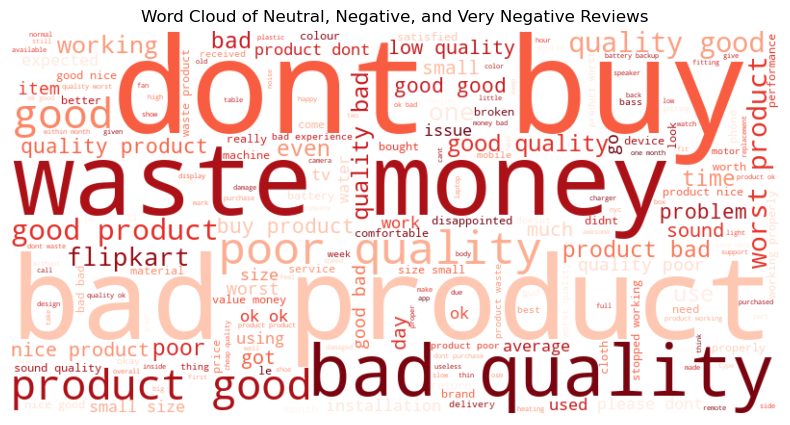

In [408]:
# Generate the WordCloud:

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_all_negative)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral, Negative, and Very Negative Reviews')
plt.show()

**Observation:**

After isolating all the non-positive feedback to understand what need fixing in one combined wordcloud, we can see what dissatisfied customers are saying. 

**Identifiable keywords**:
1. Dont buy
2. low/ poor quality
3. broken
4. waste money
5. size?
6. service bad
7. worst product
8. small size
9. average
10. stopped working.

## Visualize Sentiment Distribution in %.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [129]:
# Count distribution of Sentiments
sentiment_counts = df_flipkart['Enhanced_Sentiment'].value_counts(normalize=True) * 100


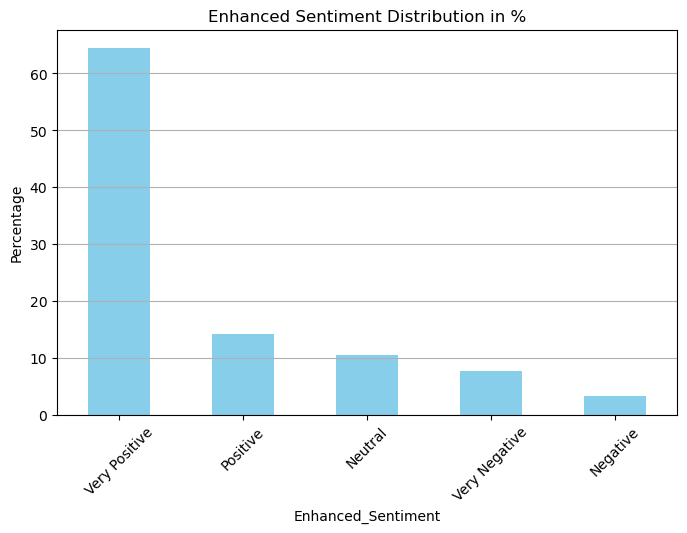

In [131]:
# Plot the chart.

plt.figure(figsize= (8, 5))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Enhanced Sentiment Distribution in %')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Observation:** The above bar chart shows the distribution of enhanced sentiment categories ranging from (Very Positive, Positive, Neutral, Negative, Very Negative) from all Flipkart reviews, converted into percentages.

- Over 60% of reviews are labeled "Very positive", suggesting that Flipkart's customers are generally highly satisfied. This is a strong signal of overall brand and product satisfaction on Flipkart.
- Positive and Neutral sentiments are moderate, ranging around 14~15% for Positive, and around 11% for Neutral. These may include short, vague, or mixed reviews like "ok ok product" or "fine".
- Negative sentiments are rare, with around 8% being Very Negative and 4% being Negative. The small share implies fewer harshly critical reviews, which could indicate good quality control or post-purchase service.

- I conclude that the review ecosystem is largely skewed torwards positivity. This could be due to genuine satisfaction or selection bias, where happy customers are more likely to leave reviews.

## Correlation Analysis on Quantitative Columns.
Let's visualize the relationships between Rate, product_price, Summary length, and possibly the sentiment scores.

We will get an immediate overview of which factors have an effect on one another quickly. For this analysis, we  use the Summary instead of Review as it contains a more lengthy descriptive of the customer's actual reviews for a more accurate analysis.

In [195]:
# First we create the review length column.
df_flipkart['Summary_length'] = df_flipkart['Summary'].fillna('').apply(lambda x: len(x.split()))    



In [139]:
# Create Sentiment Scores.
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df_flipkart['Sentiment_score'] = df_flipkart['Summary'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])

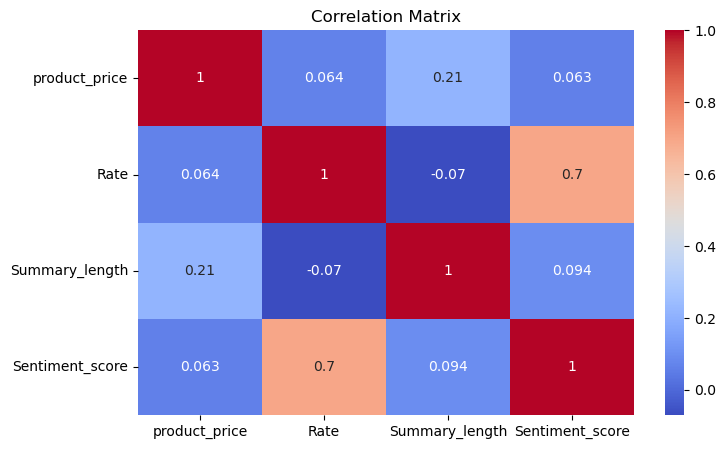

In [197]:
# Construct the heatmap. Use seaborn.

plt.figure(figsize=(8,5))
sns.heatmap(df_flipkart[['product_price', 'Rate', 'Summary_length', 'Sentiment_score']].corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observation:** The above heatmap shows the Pearson correlation coefficients between numerical features like product_price, Rate, summary_length, and sentiment_Scores. 

- Strongest positive correlation revealed that Rate and sentiment_Score = +0.70. The higher the sentiment score from VADER, the higher the customer rating tends to be. This makes sense because a more positive sentiment score is typically associated with a better rating.
  
- Very Weak positive correlation showed product_price and Rate = + 0.064. This means that the price alone does not influence ratings much. Customers do not necessarily give higher ratings for expensive items which makes sense. Since Flipkart sells a range of lifestyle products with very drastic differences in pricing, customers likely rate based on expectations met and not price tag.

  
- Negative / Minimal correlation showed Summary_length and Rate = - 0.07. This means that there is a slight negative trend where longer summaries could be tied with a more neutral or critical tone. Perhaps customers write more when they have mixed feelings or problems to explain.
- I conclude that sentiment score is a **strong predictor of ratings.** Price and summary length have little to no meaningful impact on rating scores, which reinforces the value of my NLP-based sentiment analysis in customer experience research.

## Boxplot of Summary Length Across Sentiments

Let's see if longer or shorter summaries contribute to more negative or positive sentiments or vice versa. For this analysis, we  use the Summary instead of Review as it contains a more lengthy descriptive of the customer's actual reviews for a more accurate analysis.

/var/folders/9j/x2pc1fss0cx2cwvy98t9g8n00000gn/T/ipykernel_97965/4200722040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flipkart, x='Enhanced_Sentiment', y='Summary_length', palette='Set3')


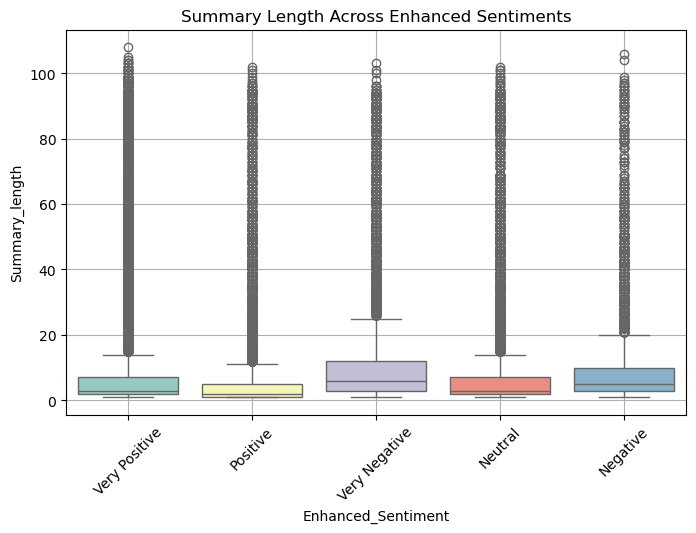

In [199]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_flipkart, x='Enhanced_Sentiment', y='Summary_length', palette='Set3')
plt.title('Summary Length Across Enhanced Sentiments')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observation:**

- The Interquartile range (IQR) varies slightly across all sentiments:

- Strong Negative Emotions drive longer reviews. We can see that Very Negative sentiment has the highest median review length, likely around 8 words. Its interquartile range (IQR) is wide, indicating significant variation in length among these reviews.

- Positive reviews have the smallest IQR, meaning most summaries are quite similar in length.

- There are multiple high outliers above the upper whisker of all clusters. No outliers appear below the lower whisker. These outliers exceed summary lengths of 100+ words, regardless of sentiment.

- What does this mean? It means the presence of many upper outliers suggests that some users write very long summaries, possibly due to strong emotional reactions (positive or negative), detailed product experiences or storytelling, or repetition of words.

- The fact there are no lower outliers means that very short summaries e.g. ("ok" or "bad") are common enough to not be considered outliers.

- I conclude that even though people write similarly short summaries across the board, those with Very Negative sentiments are more likely to go into extended detail, possibly to explain their dissatisfaction or justify their poor ratings.

- Actionable insights: Negative sentiments drive longer and more variable summaries, which could be useful when training models to detect dissatisfaction. (e.g. longer summaries may be a flag)

- Outliers in summary length are common across all sentiments, so I need to be cautious when using summary length as a clean predictor.

## Sentiment by Rating (Cross Tab)
We will use a grouped bar chart to show the sentiment breakdown across each rating.

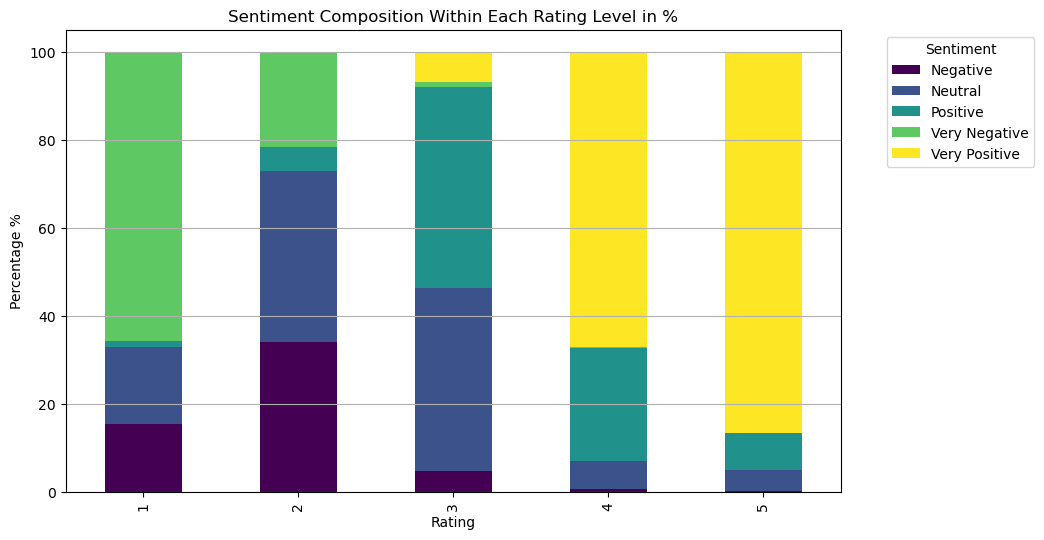

In [149]:
cross_tab = pd.crosstab(df_flipkart['Rate'], df_flipkart['Enhanced_Sentiment'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Composition Within Each Rating Level in %')
plt.ylabel('Percentage %')
plt.xlabel('Rating')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y')
plt.show()

**Observation:**
This Stacked Bar Chart is a great example to showcase the various sentiments that belonged in each rating.

Concurrently, we can also cross check the accuracy of the Sentiments constructed; .e.g Very Positive (Yellow) will never belong in a given rating of 1. 

Middle ratings given by customers like 2 and 3 have mixed signals, which is typical in real world data and human behaviour. 

I also noted a small presence of Very Positive in Rating 3 which ideally should not appear there. But given how text-based sentiment models work, it could be due to sarcasm like ('wow, amazing, broke in 2 days'). 

The percentage of this Sentiment in level 3 Ratings is however, relatively small, highlighting that my VADER sentiment model is relatively accurate. **_To be safe, I will cross check with the below code._**


In [151]:
# Let's see what Reviews are 'Very Positive' and level 3 Ratings:

# Filter the rows with Rate 3 and Enhanced_Sentiment = 'Very Positive'

mask = (df_flipkart['Rate'] == 3) & (df_flipkart['Enhanced_Sentiment'] == 'Very Positive')
df_unexpected = df_flipkart[mask]

In [153]:
df_unexpected[['Rate', 'Review', 'Summary', 'Enhanced_Sentiment']]

,Rate,Review,Summary,Enhanced_Sentiment
43,3,decent product,great deal 65 l quite big tank sufficient cool...,Very Positive
45,3,very satisfactory,the good things1 very well packed good amount ...,Very Positive
64,3,decent product,very impressive coolerpros stylish energy effi...,Very Positive
192,3,good,fan speed is low but great cooling,Very Positive
253,3,good,please share a good operating manual how are w...,Very Positive
...,...,...,...,...
204496,3,does the job,overall nice product im happy with it,Very Positive
204506,3,good,overall good got it at 830 deal the size of th...,Very Positive
204643,3,does the job,bowl and plates are small material is thin but...,Very Positive
204835,3,nice,the product is really amazing and yes the pack...,Very Positive


**Observation:**
I see. No wonder VADER seggregated these level 3 Ratings into "Very Positive' Sentiments, because the pre-assigned Summary mentioned keywords like "Very impressive coolerpros.." but the customer gave a level 3 Rate regardless.

The % of these Sentiments falling into level 3 ratings are small, and since the customer gave the rating originally, I can 'assume' that:

1. the customer either had very high expectations, and although the product was good, it did not blow them away.
2. Polite Language Bias (this falls in the aspect of Consumer Behaviour). SOmetimes customers write overly polite reviews because they dont want to sound harsh publicly especially if their names were made public (non anonymous), and especially in some cultures or personalities, even if they were disappointed, they write something that dont actually reflect their actual dispapointment in the rating.
3. They are unsure, or rated incorrectly.

**Regardless, this is very insightful, and since the percentage for this Sentiment is small, we do not need to modify the VADER model as it was relatively accurate in detecting keywords like "very impressive" as a "Very positive" sentiment.**

# Regression: Predict potential Rate by product_price, Review_length, sentiment_score, and Summary length.

I determine my Xs **(feature selection)** to be:
1. product_price: since price might affect satisfaction.
2. review_length: longer reviews could correlate with stronger opinions.
3. sentiment_score: sentiment polarity from VADER.
4. summary_length: we already know that there is a weak negative relationship from the heatmap previously.
5. Enhanced_Sentiment : convert these into dummy variables.

In [201]:
df_flipkart.dtypes

product_name                    object
product_price                    int64
Rate                             int64
Review                          object
Summary                         object
Sentiment                       object
Enhanced_Sentiment              object
Sentiment_Detailed              object
Review_missing                   int64
product_name_clean              object
Summary_clean                   object
Summary_lemmatized              object
Summary_lemmatized_allwords     object
Review_length                    int64
Sentiment_score                float64
Summary_length                   int64
dtype: object

In [207]:
df_flipkart.head(3)

,product_name,product_price,Rate,Review,Summary,Sentiment,Enhanced_Sentiment,Sentiment_Detailed,Review_missing,product_name_clean,Summary_clean,Summary_lemmatized,Summary_lemmatized_allwords,Review_length,Sentiment_score,Summary_length
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,Very Positive,Very Positive,0,candes l room personal air cooler white black ...,great cooler excellent air flow and for this p...,great cooler excellent air flow price amazing ...,great cooler excellent air flow and for this p...,1,0.9576,16
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,Very Positive,Very Positive,0,candes l room personal air cooler white black ...,best budget fit cooler nice cooling,best budget fit cooler nice cooling,best budget fit cooler nice cooling,1,0.8591,7
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,Positive,Neutral,0,candes l room personal air cooler white black ...,the quality is good but the power of air is de...,quality good power air decent,the quality is good but the power of air is de...,1,0.2382,11


In [203]:
print(df_flipkart['Summary_length'].unique())

[ 16   7  11   8   3  12   2   1   4   6   5  21  46  85  86  43  56  38
  22  41  82  30  36  14  13  15  27   9  18  29  71  77  90  37  81  32
  65  25  20  54  24  40  34  33  28  17  10  23  19  50  35  70  31  87
  78  62  26  51  52  89  68  94  57  72  79 103  61  93  76 100  84  91
  69  48  49  75  80  92  83  73  44  45  66  98  55  53  64  58  88  42
  95  63  47  39  97  60  59  74  99  67  96 102 101 104 106 105 108]


In [242]:
from sklearn.model_selection import train_test_split # used to train 80% and 20% testing later.
from sklearn.linear_model import LinearRegression # to initialise the Linear regression
from sklearn.metrics import mean_squared_error, r2_score # for evaluation and make any predictions with metrics.
from sklearn.metrics import mean_absolute_error # average of absolute difference between predicted and actual metric

regression_df = df_flipkart

# I will drop irrelevant columns first. 
regression_df = regression_df.drop(columns=['product_name', 'Review', 'Summary', 'Sentiment', 'Sentiment_Detailed', 'Review_missing', 'product_name_clean', 'Summary_clean', 'Summary_lemmatized', 'Summary_lemmatized_allwords'])

# convert the Enhanced_Sentiment into a dummy variable as they are categorical data.
regression_df = pd.get_dummies(regression_df, columns=['Enhanced_Sentiment'], drop_first=True)

# my python kernel automatically sets dummy variables to boolean data, so need convert to numeric.
dummy_cols = regression_df.select_dtypes(include=['bool']).columns
regression_df[dummy_cols] = regression_df[dummy_cols].astype('int64')

# Note: Enhanced_Sentiment_Negative is dropped above to prevent multicollinearity issues.


In [244]:
# Seggregate the predictors and target variable respectively for prediction.

X = regression_df.drop(columns=['Rate'])
y = regression_df['Rate']

In [248]:
# Train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Train the linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [252]:
# Evaluate the scores

y_pred = lr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Coefficients:', lr.coef_) # each coefficient shows how rate changes when that feature is increased by 1 unit
print('Intercept:', lr.intercept_) # the Rate when all other factors are zero.

Mean Squared Error: 0.4735550221922991
R2 Score: 0.7247316769693016
Coefficients: [ 2.19422994e-06 -7.08667633e-02  2.14257987e-01 -3.70426419e-03
  1.34747500e+00  2.08870885e+00 -5.69372369e-01  2.82481021e+00]
Intercept: 1.9650396866683515


In [278]:
# Each coefficient in lr.coef_ corresponds to one of those features (independent variables X in x_train)

# Regression Coeffient
for feature, coef in zip(X_train.columns, lr.coef_):
    print(f"{feature}:{coef}")

product_price:2.194229935335854e-06
Review_length:-0.0708667632600936
Sentiment_score:0.21425798731209572
Summary_length:-0.003704264192411746
Enhanced_Sentiment_Neutral:1.3474749997849829
Enhanced_Sentiment_Positive:2.0887088492419696
Enhanced_Sentiment_Very Negative:-0.569372368942004
Enhanced_Sentiment_Very Positive:2.824810212707471


In [256]:
# Pearson correlation

# See each correlation coefficients for features corresponding with target variable 'Rate'.

correlation_matrix = regression_df.corr()

print(correlation_matrix['Rate'].sort_values(ascending=False)) 

Rate                                1.000000
Sentiment_score                     0.697010
Enhanced_Sentiment_Very Positive    0.666582
product_price                       0.063912
Enhanced_Sentiment_Positive        -0.028003
Summary_length                     -0.070480
Review_length                      -0.113414
Enhanced_Sentiment_Neutral         -0.245981
Enhanced_Sentiment_Very Negative   -0.659580
Name: Rate, dtype: float64


## **Observations:**
**R2 Score: 0.725**
- My model can explain 72.5% of the variation in customer ratings (Rate).
- This is very good for real world, user generated text data. Out of all the reasons why people gave certain ratings, about 72.5% of those reasons are captured by my predictors.

**Mean Squared Error (MSE): 0.47**
The average squared error between predicted and actual rating is 0.47. Since ratings are from 1 to 5, an average error of under 0.5 is considered quite acceptable.

**Regression Feature Coefficients (What feature influences Ratings the most?):**
- **product_price: 0.00000219.** Almost no effect. Price have little to no influence on customer rating.
- **review length: -0.0709.** Longer reviews slightly tend to be more negative. It appears that maybe people write more when they complain.
- **sentiment scores: +0.214.** The more positive the VADER score, the higher the predicted rating. This makes sense. The more happy and positive the words in the review, the higher the rating tends to be.
- **Summary length: -0.0037.** Minor negative effect. The coefficient is so small that it is not very meaningful.
- _**Enhanced Sentiments:**_
    * **Neutral rating: +1.35.** Reviews marked 'Neutral' raise the predictor rating by 1.35 stars compared to base category (that was dropped): 'Negative'.
    -   **Positive rating: +2.09.** Positive reviews increase predicted rating by ~ 2.1 vs 'Negative'.
    -   **Very Negative rating: - 0.569.** Pulls down the score by half vs base 'Negative'. Makes sense.
    -   **Very Positive rating: +2.82.** HUGE boost, very positive reviews lift ratings by 2.8 vs 'Negative'.
 

**Pearson Coefficients Correlation Insights with Rating (How the features "move" with target "Rating")**
1. Sentiment score: +0.697. Strong positive. Higher sentiment -> higher rating.
2. Enhanced_Sentiment_Very_Positive: +0.667. Also very strong, makes sense with a high rating.
3. Product price: +0.0639. Very weak , basically no real relationship. People do not really rate based on price.
4. Enhanced_Sentiment_Positive: -0.028. Slightly negative, shorter summaries slightly correlate with higher ratings.
5. Review length: -0.113. Slightly negative - long reviews = lower ratings (complaints).
6. Enhanced_Sentiment_Neutral: -0.246. Strongish negative, likely because ' Neutral' reviews often come with low/mid scores.
7. Enhanced_Sentiment_Very_Negative: -0.660. Very strong negative. This is expected and good.
8. Summary_length: -0.0705. Slightly negative. Shorter summaries slightly correlate with higher ratings.

**Summary**

I used machine learning to find out how people talk about a product (tone, length, positivity). I built a model that can predict customer rating with over 72% accuracy, and the most powerful factor was the overall mood of the review.

I was able to predict a customer's star rating fairly accurately, just by looking at how they wrote their review, how long it was, the tone of their language, and what general mood category I labeled it as. Price does not matter much, people care more about their experience in Flipkart items, not the cost. Positive words and short, sweet reviews = hgiher ratings. Long, detailed ones, are most probably complaints.




# Key Questions - Final Insights

### 1. **What kind of sentiments do customers express in Flipkart reviews?**

Customers on Flipkart overwhelming express **positive** sentiments.
- Over 60% of reviews were labeled as "Very Positive" and another ~14% as "Positive" based on VADER-enhanced sentiment classification.
- Only a small minority were Negative or Very Negative, suggesting strong overall brand satisfaction.
- A word cloud analysis also confirmed commonly used terms like "good", "nice", "worth money", indicating a psoitive reputation among reviewers.
- Longer reviews were more likely to be criical or neutral, suggesting detailed complaints or balanced opinions.

_**Actionable: Customers are already expressing strong satisfaction. Flipkart can repurpose these reviews as UGC (user generated content) in marketing campaigns to reinforce brand loyalty, especially across categories with high positive % sentiments.**_



### 2. **Can we trust the written feedback (review text) to reflect how satisfied customers actually are?**

Yes, for the most part, written feedback closely reflects customer satisfaction.
- My Enhanced Sentiment classifier, built using the VADER model with custom fine-tuned thresholds, shows strong alignment with actual customer ratings.
- This is especially clear at the extremes:
- 5-star ratings are strongly associated with Very Positive sentiments,
- 1-star ratings align closely with Very Negative sentiments.
- Some mismatches appeared at mid-level ratings (e.g. 3-star reviews marked as Very Positive), but upon inspection, most were due to:
	- Polite or overly formal phrasing that masked disappointment,
    - Ambiguous or mixed sentiment within the same review,
    - Limitations in VADER’s ability to detect sarcasm or nuanced tone.

**_Conclusion: Written feedback is a reliable signal of satisfaction in most cases, especially when extreme ratings are involved._**

_**Actionable: We can use sentiment analysis on review text to flag potential dissatisfaction even if a customer hasn’t left a low rating — enabling proactive customer service follow-up.
We may also consider enhancing the model’s ability to detect sarcasm, slang, or cultural tone by collaborating with the marketing and customer experience teams to define a more robust keyword lexicon.**_


### 3. **Do features like review length, sentiment, or product price influence customer ratings?**
Yes, but sentiment matters far more than price or review length.

_From my correlation analysis:_
- Sentiment score had a strong correlation with ratings of + 0.70.
- Product price had almost no impact on(+0.06) on customer ratings.
- Review and summary length had mild negative correlation, possibly because people write more when they complain.
  
_From my regression analysis:_
- Sentiment-related features especially (Very Positive, Positive, and Neutral) signficantly influenced predicted ratings.
- Very Positive sentiment added +2.9 stars to predicted rating, vs Very Negative which subtracted -0.56.
- Longer reviews tended to slightly lower predicted ratings, while summary length and price had negligible effects.

_**Actionable: I conclude that customer tone and experience matters the most, not price or word count. We should not rely on premium pricing products to raise product ratings, instead, invest in experience factors like delivery, product quality, service, which may have higher returns on perceived value.**_


### 4. **Can customer rating be predicted based on sentiment and product characteristics?**
Yes, with good accuracy.

- My linear regression model achieved an R2 score of 0.725, meaning it explains 72.5% of the variation in customer ratings.
- MSE : 0.47, which is acceptable in a 1 - 5 rating scale context.
- Strong predictor: Sentiment score and Enhanced Sentiment categories.
- Price, review length, and summary length, had minimal or weak impact.

_**Actionable: I conclude that I can fairly accurately predict star ratings based on what and how people wrote, making this a powerful tool for understanding and responding to customer feedback.**_

_**If we can predict a customer's rating before they even assign it, just by analyzing thier review's tone and structure, we can take proactive action. If a review has no rating but sounds negative, our system can auto-flag it for support follow up, reducing response lag. We should also work with other departments to build real-time dashboards for product teams, customer service, and marketing, to show predicted satisfaction trends without waiting for manual reviews or surveys.**_


### 5. **What are the recurring issues behind negative reviews, and how can we address them to reduce dissatisfaction and returns?**
After analyzing over 205,000 flipkart reviews and isolating all non-positive sentiments into 1 view, I discovered recurring themes tied to broken or poor-quality items, unclear size and fit expectations, and negative service experiences.

_**Actionable:**_ 

**_1. Improve product listings accuracy. Add clearer sizing charts, real-life product images, and usage instructions to reduce misinterpretations (Especially for apparel or electronics)._**

**_2. Stregthen quality control. Flag and audit products often associated with "broken, poor quality or stopped working" and work with sellers to remove or improve underperforming stock keeping units (SKU)._**

**_3. Train post-sales support team. Investigate service related complaints and implement faster support services level agreements for high risk product categories like electronics._**

**_4. Leverage real time sentiment alerts? Work with data science team to develop a lightweight NLP model to automatically detect keywords like "don't buy" or "Waste money" in newer reviews. It should flag these reviews for quick follow up to prevent escalation or potential negative word of mouth. (Crucial)._**


